In [693]:
import numpy as np, pandas as pd
import os, sys
import joblib
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [694]:
scores_dir = './scores/'

# Combine all score files into single file

In [695]:
models = ['vae_conv_I', 'rcgan', 'T_forcing', 'timegan', 'orig']   # vae_conv_I, rcgan, timegan, T_forcing

training_sizes = [2, 5, 10, 20, 100]
datasets = ['air', 'energy', 'sine', 'stocks2', ]

all_scores = []
for model in models:
    for dataset in datasets:
        for training_size in training_sizes:
            # pred scores
            fname = f"./{scores_dir}/{model}/{model}_pred_scores_{dataset}_{training_size}.csv"
            if os.path.exists(fname):
                print(fname)
                data = pd.read_csv(fname)
                all_scores.append(data)
                
            # disc scores
            fname = f"./{scores_dir}/{model}/{model}_disc_scores_{dataset}_{training_size}.csv"
            if os.path.exists(fname):
                print(fname)
                data = pd.read_csv(fname)
                all_scores.append(data)
            else: 
                print("doesnt exist", fname)
                
all_scores = pd.concat(all_scores, ignore_index=True)
all_scores = all_scores.round(3)
all_scores.head()

././scores//vae_conv_I/vae_conv_I_pred_scores_air_2.csv
././scores//vae_conv_I/vae_conv_I_disc_scores_air_2.csv
././scores//vae_conv_I/vae_conv_I_pred_scores_air_5.csv
././scores//vae_conv_I/vae_conv_I_disc_scores_air_5.csv
././scores//vae_conv_I/vae_conv_I_pred_scores_air_10.csv
././scores//vae_conv_I/vae_conv_I_disc_scores_air_10.csv
././scores//vae_conv_I/vae_conv_I_pred_scores_air_20.csv
././scores//vae_conv_I/vae_conv_I_disc_scores_air_20.csv
././scores//vae_conv_I/vae_conv_I_pred_scores_air_100.csv
././scores//vae_conv_I/vae_conv_I_disc_scores_air_100.csv
././scores//vae_conv_I/vae_conv_I_pred_scores_energy_2.csv
././scores//vae_conv_I/vae_conv_I_disc_scores_energy_2.csv
././scores//vae_conv_I/vae_conv_I_pred_scores_energy_5.csv
././scores//vae_conv_I/vae_conv_I_disc_scores_energy_5.csv
././scores//vae_conv_I/vae_conv_I_pred_scores_energy_10.csv
././scores//vae_conv_I/vae_conv_I_disc_scores_energy_10.csv
././scores//vae_conv_I/vae_conv_I_pred_scores_energy_20.csv
././scores//vae_

,metric,model,dataset,train_perc,iters,epochs,mean,conf_int
0,pred_score,vae_conv_I,air,2,5,500,0.056,0.005
1,disc_score,vae_conv_I,air,2,5,500,0.154,0.163
2,pred_score,vae_conv_I,air,5,5,500,0.040,0.002
3,disc_score,vae_conv_I,air,5,5,500,0.292,0.207
4,pred_score,vae_conv_I,air,10,5,500,0.005,0.003


In [696]:
all_scores.to_csv(f"./{scores_dir}/{model}/{model}_disc_and_pred_scores_ALL.csv", index=False)

In [697]:
all_scores.tail(20)

,metric,model,dataset,train_perc,iters,epochs,mean,conf_int
156,pred_score,orig,air,2,5,500,0.026,0.003
157,pred_score,orig,air,5,5,500,0.022,0.001
158,pred_score,orig,air,10,5,500,0.002,0.001
159,pred_score,orig,air,20,5,500,0.004,0.001
160,pred_score,orig,air,100,5,500,0.004,0.000
161,pred_score,orig,energy,2,5,500,0.106,0.002
162,pred_score,orig,energy,5,5,500,0.144,0.015
163,pred_score,orig,energy,10,5,500,0.162,0.004
164,pred_score,orig,energy,20,5,500,0.187,0.003
165,pred_score,orig,energy,100,5,500,0.229,0.002


In [698]:
# create new df with required columns
new_df = all_scores.copy()

# convert required scores to 3 decimals and format 0as string
cols = ['mean', 'conf_int']
for col in cols: 
#     new_df[col+'new'] = new_df[col].apply(lambda x: '{:0.3f}'.format(x)[1:] if math.isnan(x) else str(x) )
    new_df[col] = new_df[col].apply(lambda x: f'{x:.3f}')
    
new_df.tail(25)

,metric,model,dataset,train_perc,iters,epochs,mean,conf_int
151,disc_score,timegan,stocks2,10,5,500,0.068,0.106
152,pred_score,timegan,stocks2,20,5,500,0.050,0.001
153,disc_score,timegan,stocks2,20,5,500,0.042,0.068
154,pred_score,timegan,stocks2,100,5,500,0.021,0.001
155,disc_score,timegan,stocks2,100,5,500,0.011,0.013
156,pred_score,orig,air,2,5,500,0.026,0.003
157,pred_score,orig,air,5,5,500,0.022,0.001
158,pred_score,orig,air,10,5,500,0.002,0.001
159,pred_score,orig,air,20,5,500,0.004,0.001
160,pred_score,orig,air,100,5,500,0.004,0.000


In [699]:
# create columns which show mean +/- std dev. 
new_df['score'] = new_df.apply( lambda row:row['mean'] + ' +/- ' + row['conf_int'], axis = 1 )
new_df.drop(columns=['mean', 'conf_int'], inplace=True) 
new_df.tail(20)

,metric,model,dataset,train_perc,iters,epochs,score
156,pred_score,orig,air,2,5,500,0.026 +/- 0.003
157,pred_score,orig,air,5,5,500,0.022 +/- 0.001
158,pred_score,orig,air,10,5,500,0.002 +/- 0.001
159,pred_score,orig,air,20,5,500,0.004 +/- 0.001
160,pred_score,orig,air,100,5,500,0.004 +/- 0.000
161,pred_score,orig,energy,2,5,500,0.106 +/- 0.002
162,pred_score,orig,energy,5,5,500,0.144 +/- 0.015
163,pred_score,orig,energy,10,5,500,0.162 +/- 0.004
164,pred_score,orig,energy,20,5,500,0.187 +/- 0.003
165,pred_score,orig,energy,100,5,500,0.229 +/- 0.002


In [700]:
#pivot out the dataset into columns 

non_pivoted_columns = ['metric', 'model', 'train_perc']
pivoting_column = ['dataset']
metrics = ['score']

final_df = []
for metric in metrics: 
    pivoted_columns = metric
    cols = non_pivoted_columns + pivoting_column + [pivoted_columns]
    temp_df = new_df[cols]
    

    pivoted = temp_df.pivot_table(index = non_pivoted_columns, 
                                          aggfunc=lambda x: ' '.join(x),
                                          columns=pivoting_column, 
                                          values=pivoted_columns).reset_index()
    
    final_df.append(pivoted)


final_df = pd.concat(final_df, axis=0, ignore_index=True)
final_df.tail(100)

dataset,metric,model,train_perc,air,energy,sine,stocks2
0,disc_score,T_forcing,2,0.500 +/- 0.000,0.500 +/- 0.000,0.295 +/- 0.320,0.300 +/- 0.316
1,disc_score,T_forcing,5,0.497 +/- 0.006,0.499 +/- 0.003,0.484 +/- 0.014,0.449 +/- 0.069
2,disc_score,T_forcing,10,0.500 +/- 0.000,0.500 +/- 0.001,0.482 +/- 0.006,0.474 +/- 0.071
3,disc_score,T_forcing,20,0.500 +/- 0.000,0.500 +/- 0.001,0.490 +/- 0.003,0.372 +/- 0.241
4,disc_score,T_forcing,100,0.495 +/- 0.010,0.499 +/- 0.001,0.484 +/- 0.006,0.450 +/- 0.099
5,disc_score,rcgan,2,0.494 +/- 0.017,0.500 +/- 0.000,0.492 +/- 0.021,NaN
6,disc_score,rcgan,5,0.500 +/- 0.000,0.500 +/- 0.000,0.499 +/- 0.003,0.500 +/- 0.000
7,disc_score,rcgan,10,0.500 +/- 0.000,0.500 +/- 0.000,0.246 +/- 0.234,0.474 +/- 0.071
8,disc_score,rcgan,20,0.500 +/- 0.000,0.500 +/- 0.000,0.281 +/- 0.132,0.479 +/- 0.028
9,disc_score,rcgan,100,0.495 +/- 0.002,0.500 +/- 0.000,0.382 +/- 0.075,0.494 +/- 0.006


In [701]:
# save in csv and excel formats
final_df.to_csv(f"./{scores_dir}/ALL_disc_and_pred_scores_PIVOTED.csv", index=False)
final_df.to_excel(f"./{scores_dir}/ALL_disc_and_pred_scores_PIVOTED.xlsx", index=False)

# Testing

In [702]:
class MinMaxScaler():
    """Min Max normalizer.
    Args:
    - data: original data

    Returns:
    - norm_data: normalized data
    """
    def fit_transform(self, data): 
        self.fit(data)
        scaled_data = self.transform(data)
        return scaled_data


    def fit(self, data):    
        self.mini = np.min(data, 0)
        self.range = np.max(data, 0) - self.mini
        return self
        

    def transform(self, data):
        numerator = data - self.mini
        scaled_data = numerator / (self.range + 1e-7)
        return scaled_data

    
    def inverse_transform(self, data):
        data *= self.range
        data += self.mini
        return data

In [703]:
gen_data_dir = "../../data/generated_data/"

# our model name
model = 'T_forcing'         # vae_conv_I, vae_IN, rcgan, T_forcing

dataset = 'air'  # 'stocks', 'stocks2', 'air', 'sine', 'energy'
perc = 2

In [704]:
sample_file_name = gen_data_dir + f'{model}/{model}_gen_samples_{dataset}_perc_{training_size}.npz'
loaded = np.load(sample_file_name)
gen_data = loaded['data'] 
scaler = MinMaxScaler( )  
gen_data = scaler.fit_transform(gen_data)

print(gen_data.shape)

# print(gen_data.mean(axis=0).mean(axis=0))

(9333, 24, 13)


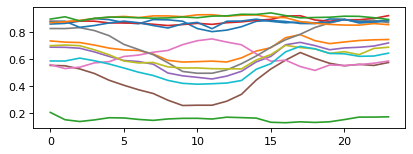

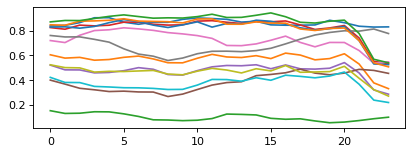

In [705]:
from matplotlib.pyplot import figure

figure(figsize=(6, 2), dpi=80)
x = plt.plot(gen_data[0])
plt.show()

figure(figsize=(6, 2), dpi=80)
x = plt.plot(gen_data[10])
plt.show()